# Telco Customer Churn

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.groupby(['Churn','gender'])['tenure'].mean()

Churn  gender
No     Female    37.858768
       Male      37.289524
Yes    Female    17.004260
       Male      18.963441
Name: tenure, dtype: float64

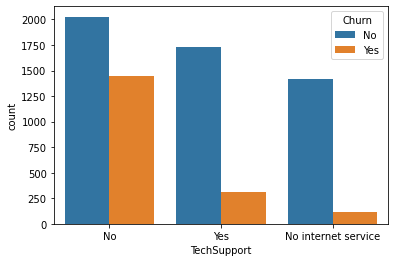

In [8]:
sns.countplot(x='TechSupport', hue='Churn', data=df);

In [9]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [10]:
df.TotalCharges.astype('float64')

ValueError: could not convert string to float: 

In [11]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.65      8
          ..
291.9      1
475.7      1
3767.4     1
550.1      1
83.3       1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df['TotalCharges'][df.TotalCharges==' ']=df['MonthlyCharges'][df.TotalCharges==' ']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.TotalCharges = df.TotalCharges.astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
df.corr().T

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


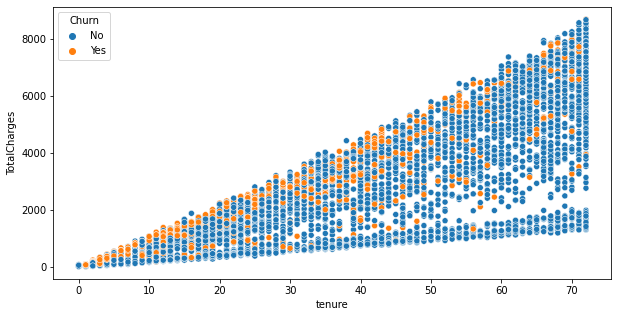

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='tenure', y='TotalCharges',hue='Churn', data=df);

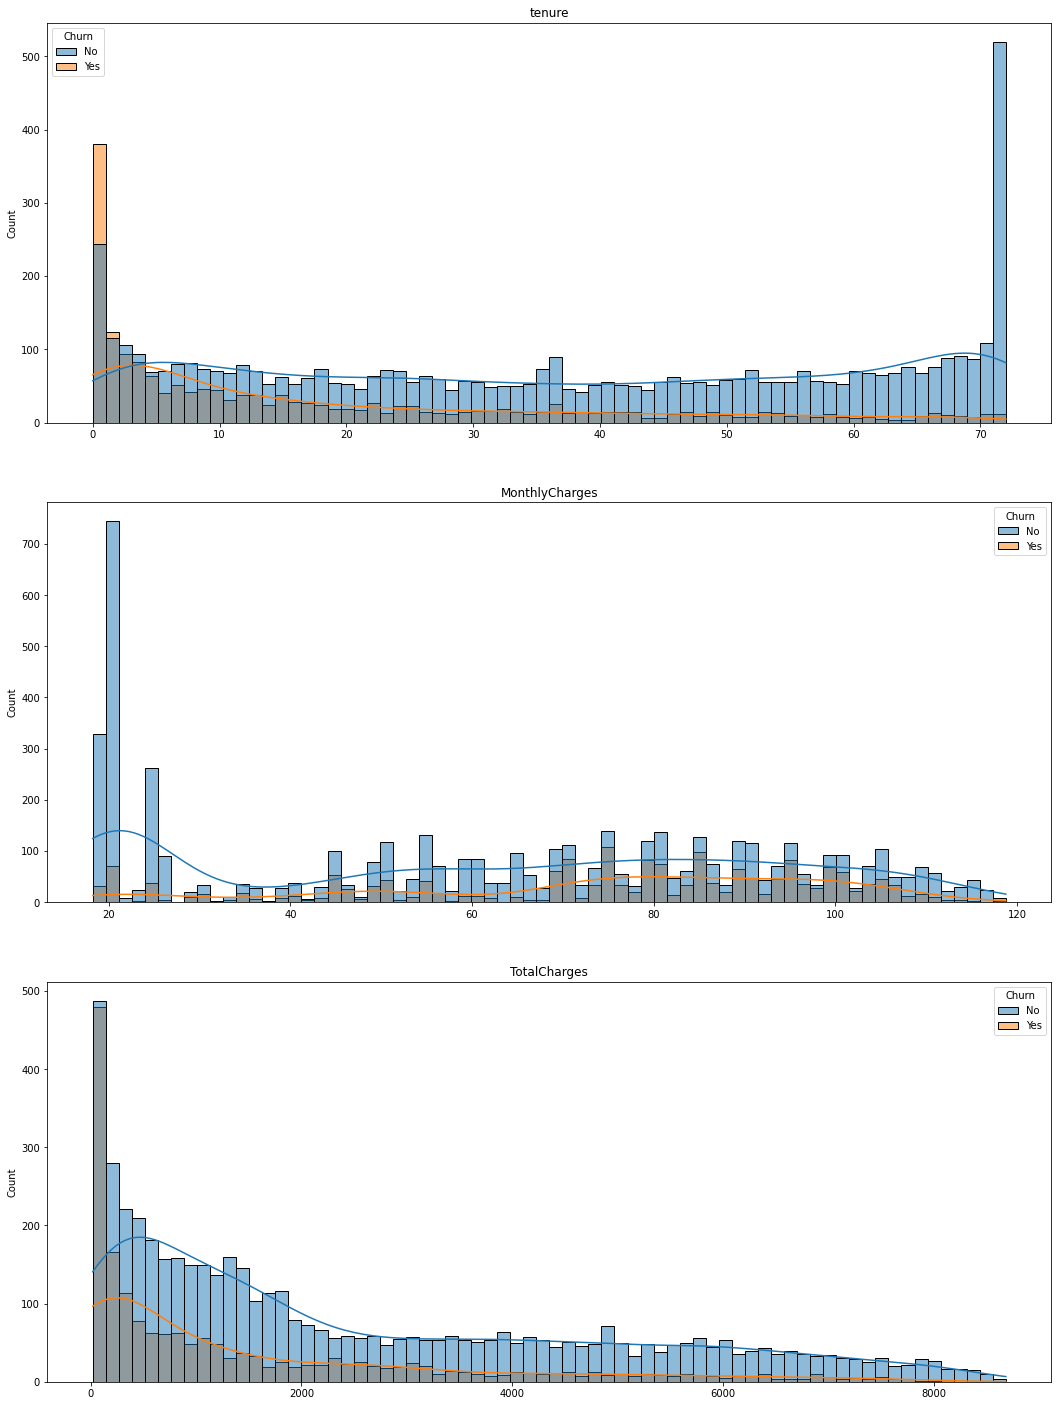

In [18]:
a = 1
plt.figure(figsize=[18,25])
for i in df[['tenure','MonthlyCharges','TotalCharges']]:
    plt.subplot(3,1,a)
    a+=1
    sns.histplot(x=i,bins = 70,hue = 'Churn',kde=True, data=df)
    plt.title(i)
    plt.xlabel(' ')

In [19]:
df.groupby('Churn').agg({'mean','min','max'})

SeniorCitizen               tenure                MonthlyCharges  \
                min max      mean    min max       mean            min   
Churn                                                                    
No                0   1  0.128721      0  72  37.569965          18.25   
Yes               0   1  0.254682      1  72  17.979133          18.85   

                         TotalCharges                        
          max       mean          min      max         mean  
Churn                                                        
No     118.75  61.265124        18.80  8672.45  2549.999497  
Yes    118.35  74.441332        18.85  8684.80  1531.796094

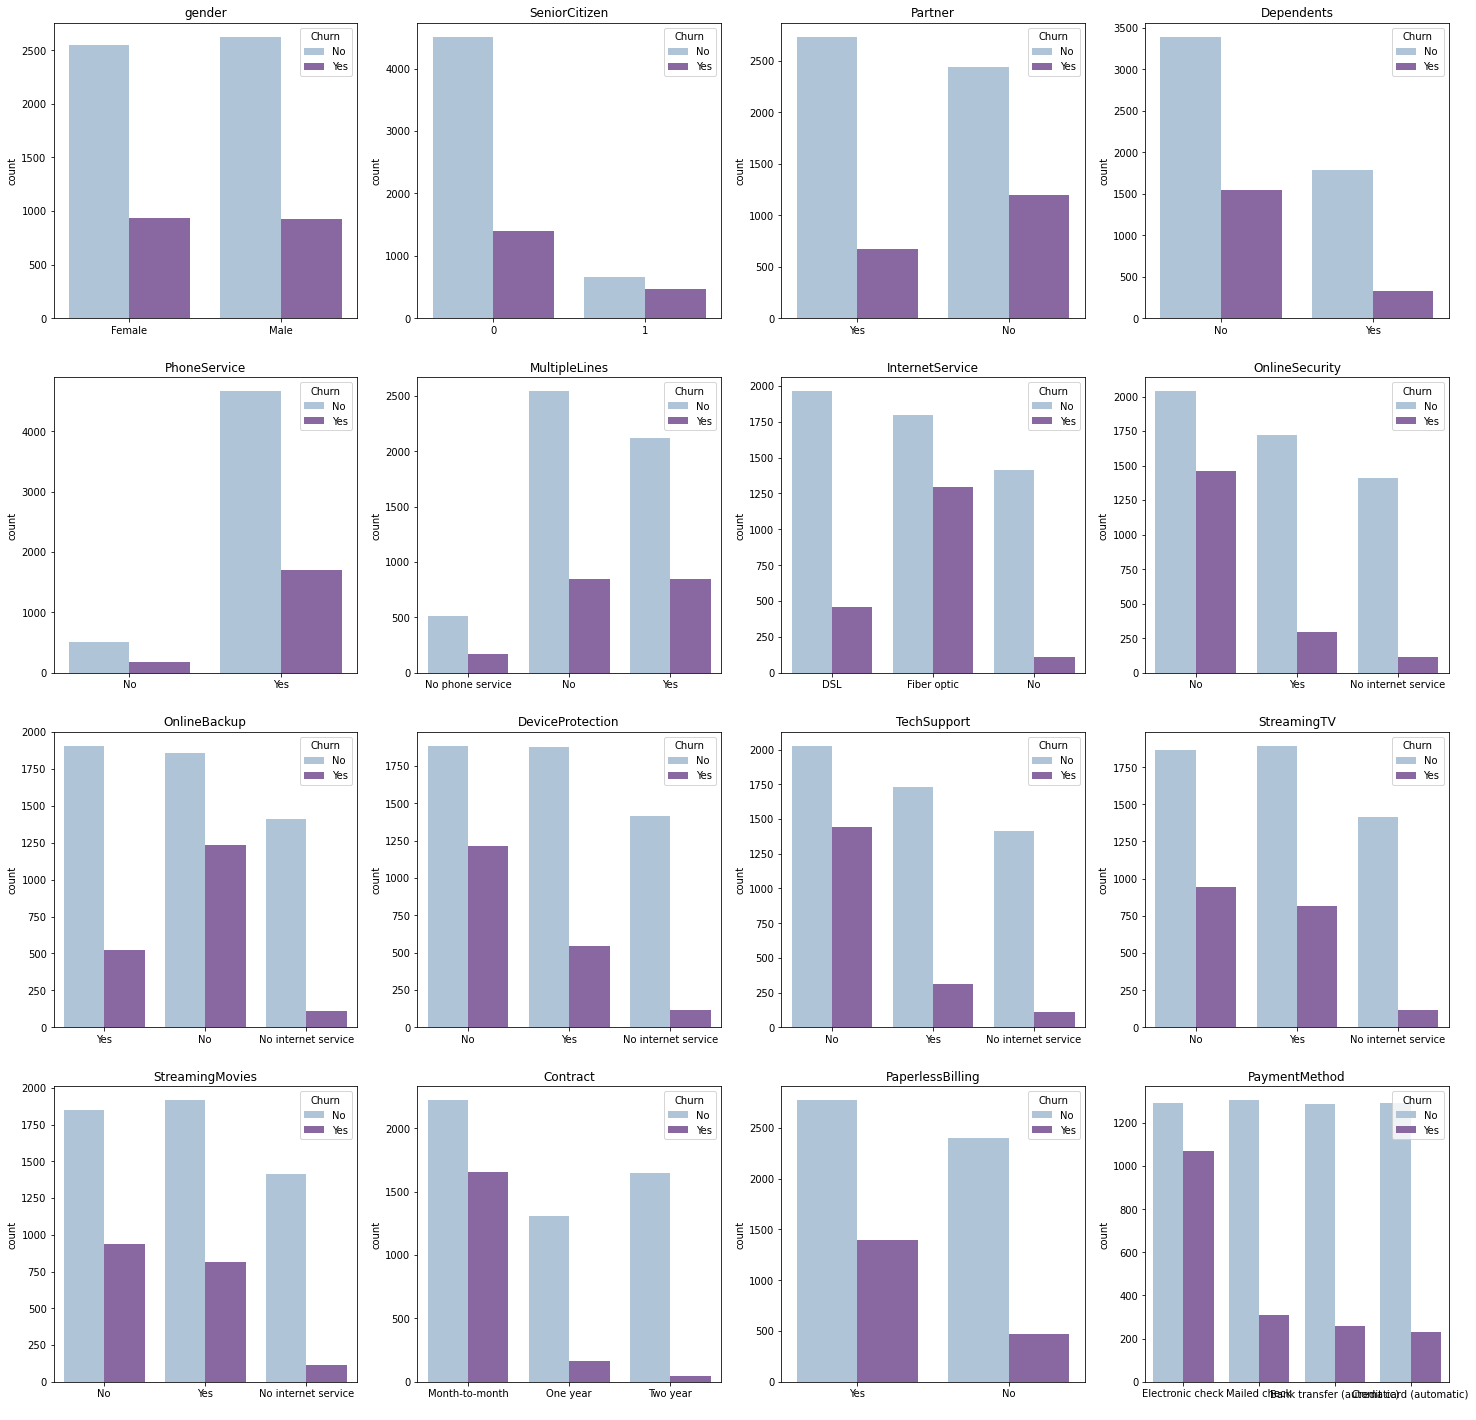

In [20]:
a = 1
plt.figure(figsize=[25,25])
df_n = df.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(4,4,a)
    a+=1
    sns.countplot(x=i,hue='Churn',palette = 'BuPu', data=df_n)
    plt.title(i)
    plt.xlabel(' ')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
for i in df[['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']]:
    df[i] = le.fit_transform(df[i])
    
df = pd.get_dummies(df,columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'], prefix_sep='_')

In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [24]:
df.corr().sort_values('Churn')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826164,-0.352229,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
Contract_Two year,-0.003695,-0.117000,0.248091,0.204613,0.558533,0.003519,-0.147889,-0.074681,0.354539,-0.302253,...,-0.257625,0.218278,0.073960,-0.622633,-0.289510,1.000000,0.154471,0.173265,-0.282138,-0.004705
OnlineBackup_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
InternetService_No,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
DeviceProtection_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
TechSupport_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
StreamingTV_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
StreamingMovies_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
OnlineSecurity_No internet service,0.006026,-0.182742,0.000615,0.139812,-0.039062,0.172209,-0.321013,-0.763557,-0.375229,-0.227890,...,-0.425339,1.000000,-0.418675,-0.218639,0.038004,0.218278,-0.002113,0.001030,-0.284917,0.321361
TotalCharges,-0.000087,0.102997,0.317532,0.062124,0.826164,0.113203,0.158562,0.651182,1.000000,-0.198347,...,-0.202186,-0.375229,0.520124,-0.444299,0.170807,0.354539,0.185994,0.182913,-0.059268,-0.295740


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [26]:
X = df.drop('Churn', axis=1)
y = df.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [27]:
models = [LogisticRegression,
          SVC,
          KNeighborsClassifier,
          DecisionTreeClassifier,
          MLPClassifier,
          GradientBoostingClassifier,
          RandomForestClassifier,
          XGBClassifier,
          LGBMClassifier,
          CatBoostClassifier]

In [28]:
Model=[]
score=[]
 
for i in models:
    model = i().fit(X_train,y_train)
    Model.append(i.__name__)
    score.append(accuracy_score(y_test, model.predict(X_test)))
    
df_m = pd.DataFrame({'Model':Model,'score':score})

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.020969
0:	learn: 0.6789609	total: 57.7ms	remaining: 57.6s
1:	learn: 0.6656480	total: 61.6ms	remaining: 30.7s
2:	learn: 0.6529074	total: 65.8ms	remaining: 21.9s
3:	learn: 0.6410198	total: 69.8ms	remaining: 17.4s
4:	learn: 0.6289114	total: 73.8ms	remaining: 14.7s
5:	learn: 0.6186639	total: 77.8ms	remaining: 12.9s
6:	learn: 0.6092012	total: 81.5ms	remaining: 11.6s
7:	learn: 0.6002326	total: 85.3ms	remaining: 10.6s
8:	learn: 0.5912981	total: 89.3ms	remaining: 9.83s
9:	learn: 0.5820798	total: 93.4ms	remaining: 9.24s
10:	learn: 0.5742689	total: 97.4ms	remaining: 8.76s
11:	learn: 0.5661148	total: 101ms	remaining: 8.35s
12:	learn: 0.5603232	total: 105ms	remaining: 7.94s
13:	learn: 0.5539403	total: 109ms	remaining: 7.65s
14:

In [29]:
df_m.sort_values('score')

,Model,score
3,DecisionTreeClassifier,0.731970
1,SVC,0.753549
2,KNeighborsClassifier,0.768313
4,MLPClassifier,0.797842
6,RandomForestClassifier,0.799546
5,GradientBoostingClassifier,0.803521
7,XGBClassifier,0.803521
0,LogisticRegression,0.809199
8,LGBMClassifier,0.812606
9,CatBoostClassifier,0.815446


## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
X_c = X.copy()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns = X_c.columns)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [33]:
Model=[]
score=[]
 
for i in models:
    model = i().fit(X_train,y_train)
    Model.append(i.__name__)
    score.append(accuracy_score(y_test, model.predict(X_test)))
    
df_m = pd.DataFrame({'Model':Model,'score':score})

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.020969
0:	learn: 0.6789609	total: 4.32ms	remaining: 4.31s
1:	learn: 0.6656480	total: 8.72ms	remaining: 4.35s
2:	learn: 0.6529074	total: 12.9ms	remaining: 4.29s
3:	learn: 0.6410198	total: 16.8ms	remaining: 4.19s
4:	learn: 0.6289114	total: 20.8ms	remaining: 4.15s
5:	learn: 0.6186639	total: 24.9ms	remaining: 4.13s
6:	learn: 0.6092012	total: 28.9ms	remaining: 4.09s
7:	learn: 0.6002326	total: 32.9ms	remaining: 4.08s
8:	learn: 0.5912981	total: 36.8ms	remaining: 4.05s
9:	learn: 0.5820798	total: 40.6ms	remaining: 4.02s
10:	learn: 0.5742689	total: 44.7ms	remaining: 4.02s
11:	learn: 0.5661148	total: 48.9ms	remaining: 4.03s
12:	learn: 0.5603232	total: 52.1ms	remaining: 3.95s
13:	learn: 0.5539403	total: 56.2ms	remaining: 3.96s


In [34]:
df_m.sort_values('score')

,Model,score
3,DecisionTreeClassifier,0.726860
2,KNeighborsClassifier,0.767178
4,MLPClassifier,0.787053
6,RandomForestClassifier,0.800681
1,SVC,0.802385
5,GradientBoostingClassifier,0.802385
7,XGBClassifier,0.803521
8,LGBMClassifier,0.810903
0,LogisticRegression,0.812039
9,CatBoostClassifier,0.815446


In [35]:
# CatBoostClassifier has best accuracy score
model = CatBoostClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Learning rate set to 0.020969
0:	learn: 0.6789609	total: 4.57ms	remaining: 4.56s
1:	learn: 0.6656480	total: 8.95ms	remaining: 4.46s
2:	learn: 0.6529074	total: 12.9ms	remaining: 4.29s
3:	learn: 0.6410198	total: 16.9ms	remaining: 4.2s
4:	learn: 0.6289114	total: 20.8ms	remaining: 4.14s
5:	learn: 0.6186639	total: 24.8ms	remaining: 4.11s
6:	learn: 0.6092012	total: 28.7ms	remaining: 4.08s
7:	learn: 0.6002326	total: 32.9ms	remaining: 4.08s
8:	learn: 0.5912981	total: 37ms	remaining: 4.08s
9:	learn: 0.5820798	total: 41.1ms	remaining: 4.07s
10:	learn: 0.5742689	total: 45.2ms	remaining: 4.07s
11:	learn: 0.5661148	total: 49.1ms	remaining: 4.04s
12:	learn: 0.5603232	total: 52.2ms	remaining: 3.96s
13:	learn: 0.5539403	total: 56.2ms	remaining: 3.96s
14:	learn: 0.5479472	total: 60.1ms	remaining: 3.95s
15:	learn: 0.5416690	total: 64.1ms	remaining: 3.94s
16:	learn: 0.5355859	total: 68ms	remaining: 3.93s
17:	learn: 0.5296303	total: 71.9ms	remaining: 3.92s
18:	learn: 0.5242859	total: 76ms	remaining: 3.92s

## Feature Importances

In [36]:
f_imp = pd.DataFrame(model.feature_importances_,columns = ['Importances'], index=X.columns)

In [37]:
f_imp

,Importances
gender,3.204397
SeniorCitizen,2.258054
Partner,1.803886
Dependents,2.047522
tenure,14.246811
PhoneService,0.337252
PaperlessBilling,4.268640
MonthlyCharges,13.766518
TotalCharges,13.403366
MultipleLines_No,1.973626


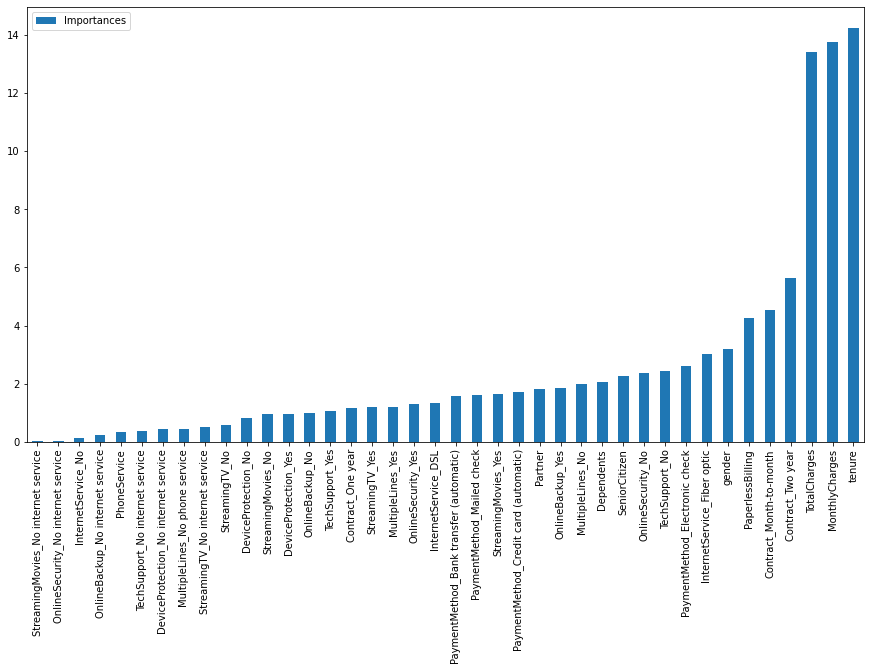

In [38]:
f_imp.sort_values('Importances').plot(kind='bar', figsize=[15,8]);

In [41]:
a = f_imp.sort_values('Importances', ascending=False)[:6].index

In [42]:
X = df[a]
y = df.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [43]:
X

,tenure,MonthlyCharges,TotalCharges,Contract_Two year,Contract_Month-to-month,PaperlessBilling
0,1,29.85,29.85,0,1,1
1,34,56.95,1889.50,0,0,0
2,2,53.85,108.15,0,1,1
3,45,42.30,1840.75,0,0,0
4,2,70.70,151.65,0,1,1
...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1
7039,72,103.20,7362.90,0,0,1
7040,11,29.60,346.45,0,1,1
7041,4,74.40,306.60,0,1,1


In [44]:
model = CatBoostClassifier().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Learning rate set to 0.020969
0:	learn: 0.6830864	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6697738	total: 5.49ms	remaining: 2.74s
2:	learn: 0.6571713	total: 8.62ms	remaining: 2.87s
3:	learn: 0.6449579	total: 11.8ms	remaining: 2.94s
4:	learn: 0.6344118	total: 14.8ms	remaining: 2.94s
5:	learn: 0.6245638	total: 17.5ms	remaining: 2.9s
6:	learn: 0.6153102	total: 20.3ms	remaining: 2.87s
7:	learn: 0.6070816	total: 22.4ms	remaining: 2.77s
8:	learn: 0.5980455	total: 25.2ms	remaining: 2.77s
9:	learn: 0.5893107	total: 28ms	remaining: 2.77s
10:	learn: 0.5812909	total: 30.7ms	remaining: 2.76s
11:	learn: 0.5736253	total: 33.4ms	remaining: 2.75s
12:	learn: 0.5658699	total: 36.4ms	remaining: 2.76s
13:	learn: 0.5587406	total: 39.5ms	remaining: 2.78s
14:	learn: 0.5528919	total: 42.5ms	remaining: 2.79s
15:	learn: 0.5469496	total: 45.7ms	remaining: 2.81s
16:	learn: 0.5416119	total: 48.9ms	remaining: 2.83s
17:	learn: 0.5359687	total: 52.2ms	remaining: 2.85s
18:	learn: 0.5311203	total: 55.4ms	remaining: 2.8

In [ ]:
# CatBoostClassifier has an accuracy score of 81%